<a href="https://colab.research.google.com/github/DataDoggo215/NLP_FastText/blob/main/Fasttext_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Purpose of this notebook is to experiment with FastText library with an application of Tika. I read an interesting article from [Usman Malik](https://stackabuse.com/python-for-nlp-working-with-facebook-fasttext-library/) and wanted to replicate this library applying it to a life science application. 

We will be using the Doctors without Borders 2016 Medical Guidelines and applying Facebook FastText Library to it. The PDF can be found here:
https://samumsf.org/sites/default/files/2018-10/MSF%20Clinical%20Guideline%202016.pdf




In [1]:
!wget "https://samumsf.org/sites/default/files/2018-10/MSF%20Clinical%20Guideline%202016.pdf"

--2022-08-16 04:31:07--  https://samumsf.org/sites/default/files/2018-10/MSF%20Clinical%20Guideline%202016.pdf
Resolving samumsf.org (samumsf.org)... 64.225.102.238
Connecting to samumsf.org (samumsf.org)|64.225.102.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4651560 (4.4M) [application/pdf]
Saving to: ‘MSF Clinical Guideline 2016.pdf’

MSF Clinical Guidel 100%[===================>]   4.44M  1.89MB/s    in 2.3s    

2022-08-16 04:31:11 (1.89 MB/s) - ‘MSF Clinical Guideline 2016.pdf’ saved [4651560/4651560]



In [2]:
%%capture
!pip install tika        #Tika is a Python Library to extract Text from Pdf
!pip install fasttext

In [3]:
%%capture
import nltk
from pprint import pprint
from gensim.models import FastText
import fasttext
nltk.download('punkt')
from nltk import word_tokenize
from pprint import pprint
from tika import parser
import string
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
rawText = parser.from_file("MSF Clinical Guideline 2016.pdf")

INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.


In [5]:
print(type(rawText))    #Tika parser returns a dictionary

<class 'dict'>


In [6]:
rawList = rawText['content'].splitlines()                        
rawList = [item.lower() for item in rawList if item.strip()]    
print(len(rawList))   #About 15569 sentences in total
print(rawList)   #sample sentence

15569
['clinical guidelines - 2016 (updated: 21 september 2017)', 'clinical guidelines', 'diagnosis and treatment manual', 'for curative programmes in hospitals and dispensaries', 'guidance for prescribing', '2016 edition', 'editorial committee', 'véronique grouzard, jean rigal, marianne sutton', 'with the participation of', 'p. albajar, s. balkan, p. barel, e. baron, t. baubet, m. biot, f. boillot, l. bonte, m.c. bottineau,', 'm.e. burny, v. captier, m. cereceda, f. charles, m.j de chazelles, d. chédorge, a.s. coutin,', 'c. danet, b. dehaye, k. dilworth, f. drogoul, f. fermon, b. graz, m. gueguen, b. guyard-boileau,', 'g. hanquet, g. harczi, m. van herp, l. hiffler, c. hook, v. ioos, k. de jong, r. kanapathipillai,', 's. lagrange, e. lasry, x. lassalle, b. laumont, d. laureillard, p. lechevalier, m. lekkerkerker,', 'd. martinez, j. menschik, d. mesia, a. minetti, r. murphy, r. petrucci, n. peyraud, s. pilon,', 'k. ritmeijer, l. shanks, m. de smet, s. seyfert, j. stassijns, j. thompson

In [11]:
msf_str = ' '.join(rawList)     #Join list of sentences into string
for c in string.punctuation:
    msf_str = msf_str.replace(c, "")  #remove punctuations
len(msf_str)                                  

640363

In [12]:
with open("msf2016.txt", "w") as text_file:
    text_file.write(msf_str)                                       #write string as text file

In [16]:
%%time
msf_model = fasttext.train_unsupervised('msf2016.txt', 
                                        epoch=50,
                                        dim=300,
                                        lr= 0.01,
                                        wordNgrams = 5 )    #train model using fasttext
msf_model.save_model('msf_model.bin')    #save trained model

CPU times: user 3min 49s, sys: 6.59 s, total: 3min 56s
Wall time: 4min


In [19]:
fasttext_trained_model = FastText.load_fasttext_format('msf_model.bin') 

In [20]:
fasttext_trained_model.wv.vocab

{'the': <gensim.models.keyedvectors.Vocab at 0x7f2da498be90>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f2da498bed0>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7f2da498bb90>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7f2da4722410>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7f2da4722e50>,
 'or': <gensim.models.keyedvectors.Vocab at 0x7f2da4722a90>,
 '–': <gensim.models.keyedvectors.Vocab at 0x7f2da4722c50>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f2da4722d50>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f2da4722990>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7f2da4722710>,
 'treatment': <gensim.models.keyedvectors.Vocab at 0x7f2da4714090>,
 '•': <gensim.models.keyedvectors.Vocab at 0x7f2da47140d0>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7f2da4714150>,
 '2': <gensim.models.keyedvectors.Vocab at 0x7f2da4714190>,
 'if': <gensim.models.keyedvectors.Vocab at 0x7f2da4714210>,
 'children': <gensim.models.keyedvectors.Vocab at 0x7f2da4714290>,
 'be': <ge

In [22]:
print("Words associated with dizziness in our model{}\n" .format(fasttext_trained_model.wv.most_similar(["dizziness"], topn=5)))
print("Words associated with paracetamol in our model{}\n" .format(fasttext_trained_model.wv.most_similar(["paracetamol"], topn=5)))
print("Words associated with in our pain model{}\n" .format(fasttext_trained_model.wv.most_similar(["pain"], topn=5)))
print("Words associated with in our gastroenteritis model{}\n" .format(fasttext_trained_model.wv.most_similar(["gastroenteritis"], topn=5)))
print("Words associated with in our malaria model{}\n" .format(fasttext_trained_model.wv.most_similar(["malaria"], topn=5)))
print("Words associated with in our sepsis model{}\n" .format(fasttext_trained_model.wv.most_similar(["sepsis"], topn=5)))
print("Words associated with in our ciprofloxacin model{}\n" .format(fasttext_trained_model.wv.most_similar(["ciprofloxacin"], topn=5)))
print("Words associated with in our adverse effect model{}\n" .format(fasttext_trained_model.wv.most_similar(["adverse effect"], topn=5)))
print("Words associated with in our ulcer model{}\n" .format(fasttext_trained_model.wv.most_similar(["ulcer"], topn=5)))
print("Words associated with in our insulin model{}\n" .format(fasttext_trained_model.wv.most_similar(["insulin"], topn=5)))
print("Words associated with in our diabetes model{}\n" .format(fasttext_trained_model.wv.most_similar(["diabetes"], topn=5)))

Words associated with dizziness in our model[('drowsiness', 0.9514392614364624), ('worsen', 0.9291642904281616), ('hoarse', 0.9247850179672241), ('disappears', 0.9113582968711853), ('exercise', 0.9102153778076172)]

Words associated with paracetamol in our model[('ibuprofen', 0.9093706011772156), ('tramadol', 0.8766424655914307), ('nsaid', 0.87250816822052), ('analgesic', 0.8481435775756836), ('antipyretics', 0.840915322303772)]

Words associated with in our pain model[('painful', 0.9087786674499512), ('paracetamol', 0.8303413391113281), ('abdomen', 0.8216066360473633), ('tenderness', 0.8064980506896973), ('anorexia', 0.8059426546096802)]

Words associated with in our gastroenteritis model[('gas', 0.9424405097961426), ('dyspepsia', 0.9311060905456543), ('gastrooesophageal', 0.9091954231262207), ('gastrointestinal', 0.9085849523544312), ('epistaxis', 0.8995848894119263)]

Words associated with in our malaria model[('serology', 0.8736555576324463), ('pathology', 0.8588211536407471), ('bl

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:2018: RuntimeWarning: invalid value encountered in true_divide
  (self.vectors_ngrams / sqrt((self.vectors_ngrams ** 2).sum(-1))[..., newaxis]).astype(REAL)


Visualization of PCA https://stackabuse.com/python-for-nlp-working-with-facebook-fasttext-library/

In [23]:
semantically_similar_words = {words: [item[0] for item in fasttext_trained_model.wv.most_similar([words], topn=5)]
                  for words in ['paracetamol','Nurse' ,'pain', 'adverse effect', 'dizziness',"diabetes"]}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

paracetamol:['ibuprofen', 'tramadol', 'nsaid', 'analgesic', 'antipyretics']
Nurse:['course', 'benefit', 'importance', 'delay', 'support']
pain:['painful', 'paracetamol', 'abdomen', 'tenderness', 'anorexia']
adverse effect:['effects', 'adverse', 'effect', 'effectiveness', 'effective']
dizziness:['drowsiness', 'worsen', 'hoarse', 'disappears', 'exercise']
diabetes:['metabolic', 'delirium', 'diagnoses', 'potentially', 'etc']


In [24]:
all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['paracetamol', 'ibuprofen', 'tramadol', 'nsaid', 'analgesic', 'antipyretics', 'Nurse', 'course', 'benefit', 'importance', 'delay', 'support', 'pain', 'painful', 'paracetamol', 'abdomen', 'tenderness', 'anorexia', 'adverse effect', 'effects', 'adverse', 'effect', 'effectiveness', 'effective', 'dizziness', 'drowsiness', 'worsen', 'hoarse', 'disappears', 'exercise', 'diabetes', 'metabolic', 'delirium', 'diagnoses', 'potentially', 'etc']
<class 'list'>
36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


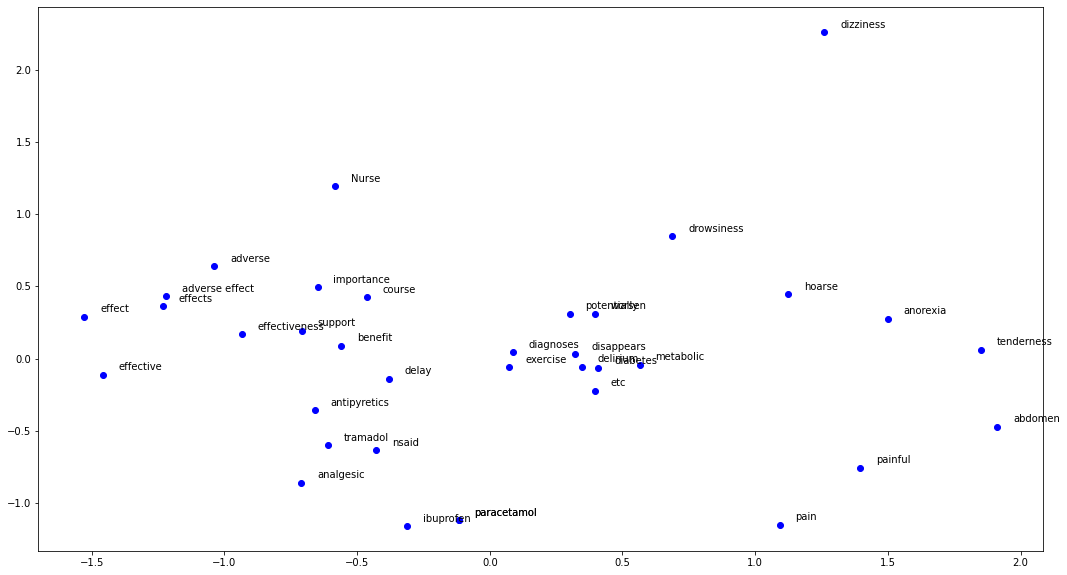

In [25]:
word_vectors = fasttext_trained_model[all_similar_words]

pca = PCA(2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='b')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')